In [2]:
#Jeg importerer nødvendige biblioteker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta

In [ ]:

# Bestemmer start dato
start_dato = datetime(2022, 9, 26)

# Jeg setter slutt dato til i går
slutt_dato = datetime.now() - timedelta(days=1)

# Dato områder liste
omrader = ["NO1", "NO2", "NO3", "NO4", "NO5"]

#Oppretter en tom liste for alle dataer
fullData_liste = []

print("Data trekkes. Det kan ta litt tid...")


# iterasjon for start og slutt dato
for dato in pd.date_range(start_dato, slutt_dato):

    # Iterasjon for alle områder
    for omrade in omrader:

        # Formaterer datoen
        aar = dato.strftime("%Y")
        maaned = dato.strftime("%m")
        dag = dato.strftime("%d")
        url = f"https://www.hvakosterstrommen.no/api/v1/prices/{aar}/{maaned}-{dag}_{omrade}.json"
        
        # Får data fra URL
        response = requests.get(url, verify=False)
        
    
        if response.status_code == 200:
            # Endrer JSON til liste
            dagligData = response.json()
            
            # Vi legger tid tilhører hvilken område
            for timeData in dagligData:

                timeData['area'] = omrade
            
            # Vi legger dagligData i fullData_liste
            fullData_liste.extend(dagligData)

# jeg oppretter dataframe ved pandas
df = pd.DataFrame(fullData_liste)

# Lagrer DataFrame til en CSV-fil med et nytt, beskrivende navn
filnavn = "strompriser_2022_til_idag.csv"
df.to_csv(filnavn, index=False)

# Viser informasjon om dataene
print("\nData ble hentet")
print(f"Totalt {len(df)} data hentet.")
print("\nDe første 5 radene er:")
print(df.head())

#Navnet på kolonnene
print("\nKolonnenavnene er:")
print(df.columns)

Data trekkes. Det kan ta litt tid...


c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/e


Data ble hentet
Totalt 131880 data hentet.

De første 5 radene er:
   NOK_per_kWh  EUR_per_kWh      EXR                 time_start  \
0      2.57688      0.24877  10.3585  2022-09-26T00:00:00+02:00   
1      1.87996      0.18149  10.3585  2022-09-26T01:00:00+02:00   
2      1.62463      0.15684  10.3585  2022-09-26T02:00:00+02:00   
3      1.29336      0.12486  10.3585  2022-09-26T03:00:00+02:00   
4      1.04776      0.10115  10.3585  2022-09-26T04:00:00+02:00   

                    time_end area  
0  2022-09-26T01:00:00+02:00  NO1  
1  2022-09-26T02:00:00+02:00  NO1  
2  2022-09-26T03:00:00+02:00  NO1  
3  2022-09-26T04:00:00+02:00  NO1  
4  2022-09-26T05:00:00+02:00  NO1  

Kolonnenavnene er:
Index(['NOK_per_kWh', 'EUR_per_kWh', 'EXR', 'time_start', 'time_end', 'area'], dtype='object')


In [93]:
# Leser CSV-filen med standard komma-separator
df = pd.read_csv("strompriser_2022_til_idag.csv")

df.to_csv("strompriser_2022_til_idag.csv", sep=';', index=False)

In [94]:
# Vis en oversikt over DataFrame (datatyper og manglende verdier)
print("--- Oversikt over datasettet (df.info()) ---")
print(df.info())

print("\n--- Statistisk sammendrag (df.describe()) ---")
# Viser statistikk for numeriske kolonner (kan hjelpe oss å se outliers)
print(df.describe())

# Sjekk spesifikt for manglende verdier i hver kolonne
print("\n--- Antall manglende verdier per kolonne ---")
print(df.isnull().sum())

--- Oversikt over datasettet (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131880 entries, 0 to 131879
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NOK_per_kWh  131880 non-null  float64
 1   EUR_per_kWh  131880 non-null  float64
 2   EXR          131880 non-null  float64
 3   time_start   131880 non-null  object 
 4   time_end     131880 non-null  object 
 5   area         131880 non-null  object 
dtypes: float64(3), object(3)
memory usage: 6.0+ MB
None

--- Statistisk sammendrag (df.describe()) ---
         NOK_per_kWh    EUR_per_kWh            EXR
count  131880.000000  131880.000000  131880.000000
mean        0.579802       0.051477      11.469744
std         0.598621       0.055733       0.430307
min        -0.709300      -0.061840      10.183500
25%         0.189598       0.016820      11.354000
50%         0.453380       0.039310      11.611800
75%         0.792300       0.068970     

In [95]:
df.describe() #Gir en statistisk oversikt over numeriske kolonner i datasettet

NOK_per_kWh    EUR_per_kWh            EXR
count  131880.000000  131880.000000  131880.000000
mean        0.579802       0.051477      11.469744
std         0.598621       0.055733       0.430307
min        -0.709300      -0.061840      10.183500
25%         0.189598       0.016820      11.354000
50%         0.453380       0.039310      11.611800
75%         0.792300       0.068970      11.759000
max        10.537820       0.898250      12.110800

In [117]:
#Konverterer 'time_start' til en datotid-datatype
df['time_start'] = pd.to_datetime(df['time_start'], utc=True)
df['time_end'] = pd.to_datetime(df['time_end'], utc=True)

df["Ører_per_kwh"] = df["NOK_per_kWh"] * 100  # Konverterer NOK/kWh til Øre/kWh
df["Ører_per_kwh_inkmva"] = df["Ører_per_kwh"]*1.25 #Lager en ny kollone som inkluderer mva 25 %
df.head()

NOK_per_kWh  EUR_per_kWh      EXR                time_start  \
0      2.57688      0.24877  10.3585 2022-09-25 22:00:00+00:00   
1      1.87996      0.18149  10.3585 2022-09-25 23:00:00+00:00   
2      1.62463      0.15684  10.3585 2022-09-26 00:00:00+00:00   
3      1.29336      0.12486  10.3585 2022-09-26 01:00:00+00:00   
4      1.04776      0.10115  10.3585 2022-09-26 02:00:00+00:00   

                   time_end area  Ører_per_kwh  Ører_per_kwh_inkmva  
0 2022-09-25 23:00:00+00:00  NO1       257.688            322.11000  
1 2022-09-26 00:00:00+00:00  NO1       187.996            234.99500  
2 2022-09-26 01:00:00+00:00  NO1       162.463            203.07875  
3 2022-09-26 02:00:00+00:00  NO1       129.336            161.67000  
4 2022-09-26 03:00:00+00:00  NO1       104.776            130.97000

In [98]:
#Sjekker at konverteringen var vellykket
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131880 entries, 0 to 131879
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   NOK_per_kWh          131880 non-null  float64            
 1   EUR_per_kWh          131880 non-null  float64            
 2   EXR                  131880 non-null  float64            
 3   time_start           131880 non-null  datetime64[ns, UTC]
 4   time_end             131880 non-null  datetime64[ns, UTC]
 5   area                 131880 non-null  object             
 6   Ører_per_kwh         131880 non-null  float64            
 7   Ører_per_kwh_inkmva  131880 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(5), object(1)
memory usage: 8.0+ MB
None


In [100]:
#Gjennomsnittlig strømpris per område

# Beregner og skriver ut gjennomsnittlig strømpris, median av strømpris og standardavvik for hvert område og finner høyeste

for omrade in omrader:
    gjennomsnittPrisOmrader = df.groupby("area", observed=True)["Ører_per_kwh_inkmva"].mean()
    
    print(f"\nGjennomsnittlig strømpris for {omrade}: {gjennomsnittPrisOmrader[omrade]:.4f} øre/kWh ink mva")
print("---")
print(f"Dyreste området: {gjennomsnittPrisOmrader.idxmax()} Pris: {gjennomsnittPrisOmrader.max()} øre/kWh ink mva")

print("-----------------------\n"*3)

for omrade in omrader:
    standartavvik = df.groupby("area")["Ører_per_kwh_inkmva"].std()
    
    print(f"\nStandardavvik for {omrade}: {standartavvik[omrade]:.4f} øre/kWh ink mva")
print("---")
print(f"Høyeste pris endringer er i: {standartavvik.idxmax()}")

print("-----------------------\n"*3)
for omrade in omrader:
    median = df.groupby("area")["Ører_per_kwh_inkmva"].median()
    print(f"\nMedian for {omrade}: {median[omrade]:.4f} øre/kWh ink mva")
print("---")
print(f"Høyeste median er i: {median.idxmax()} {median.max()} øre/kWh ink mva")


Gjennomsnittlig strømpris for NO1: 91.6401 øre/kWh ink mva

Gjennomsnittlig strømpris for NO2: 104.4890 øre/kWh ink mva

Gjennomsnittlig strømpris for NO3: 47.2511 øre/kWh ink mva

Gjennomsnittlig strømpris for NO4: 33.0159 øre/kWh ink mva

Gjennomsnittlig strømpris for NO5: 85.9801 øre/kWh ink mva
---
Dyreste området: NO2 Pris: 104.48902837807097 øre/kWh ink mva
-----------------------
-----------------------
-----------------------


Standardavvik for NO1: 81.4355 øre/kWh ink mva

Standardavvik for NO2: 77.3836 øre/kWh ink mva

Standardavvik for NO3: 59.4804 øre/kWh ink mva

Standardavvik for NO4: 41.5343 øre/kWh ink mva

Standardavvik for NO5: 79.6604 øre/kWh ink mva
---
Høyeste pris endringer er i: NO1
-----------------------
-----------------------
-----------------------


Median for NO1: 76.8781 øre/kWh ink mva

Median for NO2: 90.1406 øre/kWh ink mva

Median for NO3: 30.8012 øre/kWh ink mva

Median for NO4: 24.1812 øre/kWh ink mva

Median for NO5: 68.3738 øre/kWh ink mva
---
H

In [101]:
print(df.groupby("area")["Ører_per_kwh_inkmva"].max())
print(f"Høyeste pris mellom {start_dato.date()} og {slutt_dato.date()}: {df['Ører_per_kwh_inkmva'].max()} øre/kWh ink mva")

area
NO1     877.38125
NO2    1317.22750
NO3     778.41625
NO4     666.00750
NO5     877.38125
Name: Ører_per_kwh_inkmva, dtype: float64
Høyeste pris mellom 2022-09-26 og 2025-09-28: 1317.2275 øre/kWh ink mva


Gjennomsnitlig pris er høyest i NO2 området. Median er også høyest i område NO2. Det lønner seg å kjøpe Norges pris i dette området. Men i NO3 og NO4 lønner det seg ikke. Gjennomsnitten og medianen er mye lavere enn Norgespris.

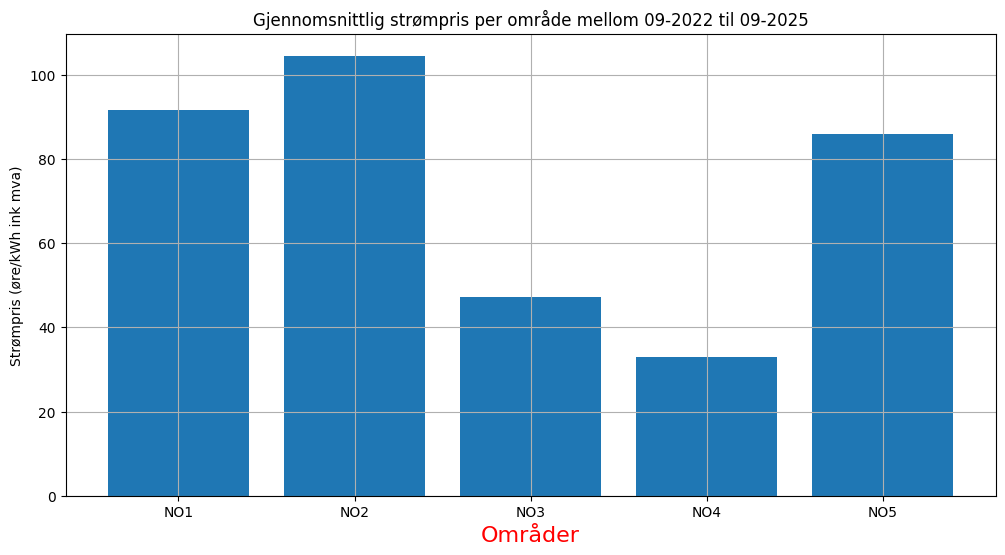

In [105]:
# Visualisering av gjennomsnittlig strømpris per område ink mva

plt.figure(figsize=(12, 6))
gjennomsnittPrisOmrader = df.groupby("area", observed=True)["Ører_per_kwh_inkmva"].mean()
plt.bar(gjennomsnittPrisOmrader.index, gjennomsnittPrisOmrader.values)
plt.title("Gjennomsnittlig strømpris per område mellom 09-2022 til 09-2025")
plt.xlabel("Områder", color="red", font = {'size': 16})
plt.ylabel("Strømpris (øre/kWh ink mva)")
plt.grid(True)
plt.show()

In [106]:
# Vi konverterer til datetime og fjerner tidssoneinfo for enklere plotting
df['time_start'] = pd.to_datetime(df['time_start']).dt.tz_localize(None)
df["time_start"].head()

0   2022-09-25 22:00:00
1   2022-09-25 23:00:00
2   2022-09-26 00:00:00
3   2022-09-26 01:00:00
4   2022-09-26 02:00:00
Name: time_start, dtype: datetime64[ns]

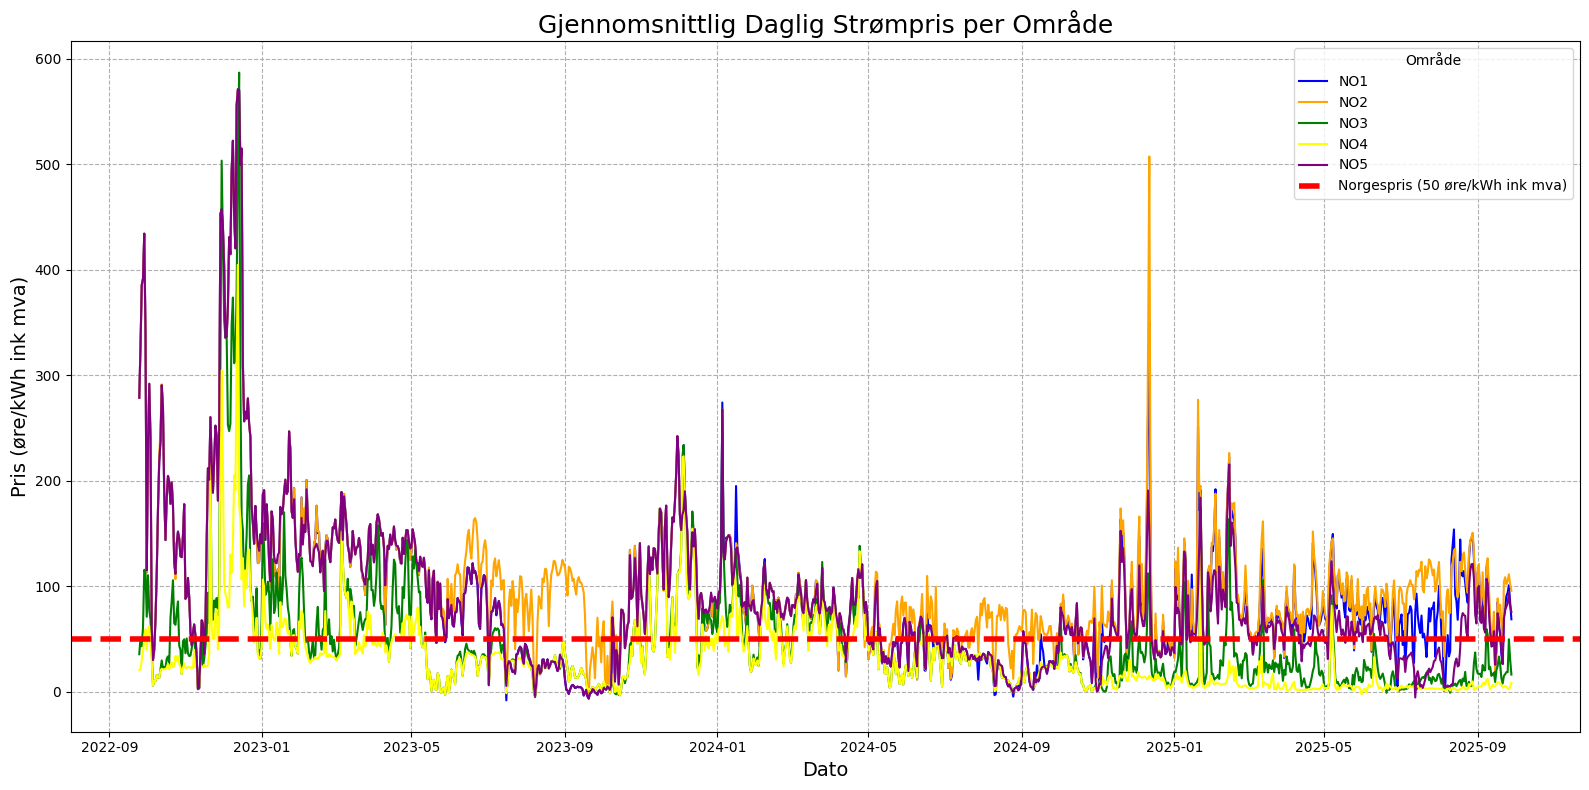

In [108]:
#Beregner daglig snittpris per område ---
#grupperer på dato og område, og regner ut gjennomsnittet
daglig_snitt = df.groupby([df['time_start'].dt.date, 'area'])['Ører_per_kwh_inkmva'].mean().unstack()

# Linje diagram for daglig snittpris per område
fig, ax = plt.subplots(figsize=(16, 8)) # Oppretter figur og akser med en god størrelse

farger = ['blue', 'orange', 'green', 'yellow', 'purple']
daglig_snitt.plot(ax=ax, linewidth=1.5, color = farger) # Plotter dataene

# Legg til en horisontal linje for "Norgesprisen"
ax.axhline(50, color='red', linestyle='--', linewidth=4, label='Norgespris (50 øre/kWh ink mva)')



# --- 4. Tilpass og vis plottet ---
ax.set_title('Gjennomsnittlig Daglig Strømpris per Område', fontsize=18)
ax.set_xlabel('Dato', fontsize=14)
ax.set_ylabel('Pris (øre/kWh ink mva)', fontsize=14)
ax.legend(title='Område')
ax.grid(True, linestyle='--') # Legger til rutenett

plt.tight_layout() # Sørger for at alt får plass
plt.show()

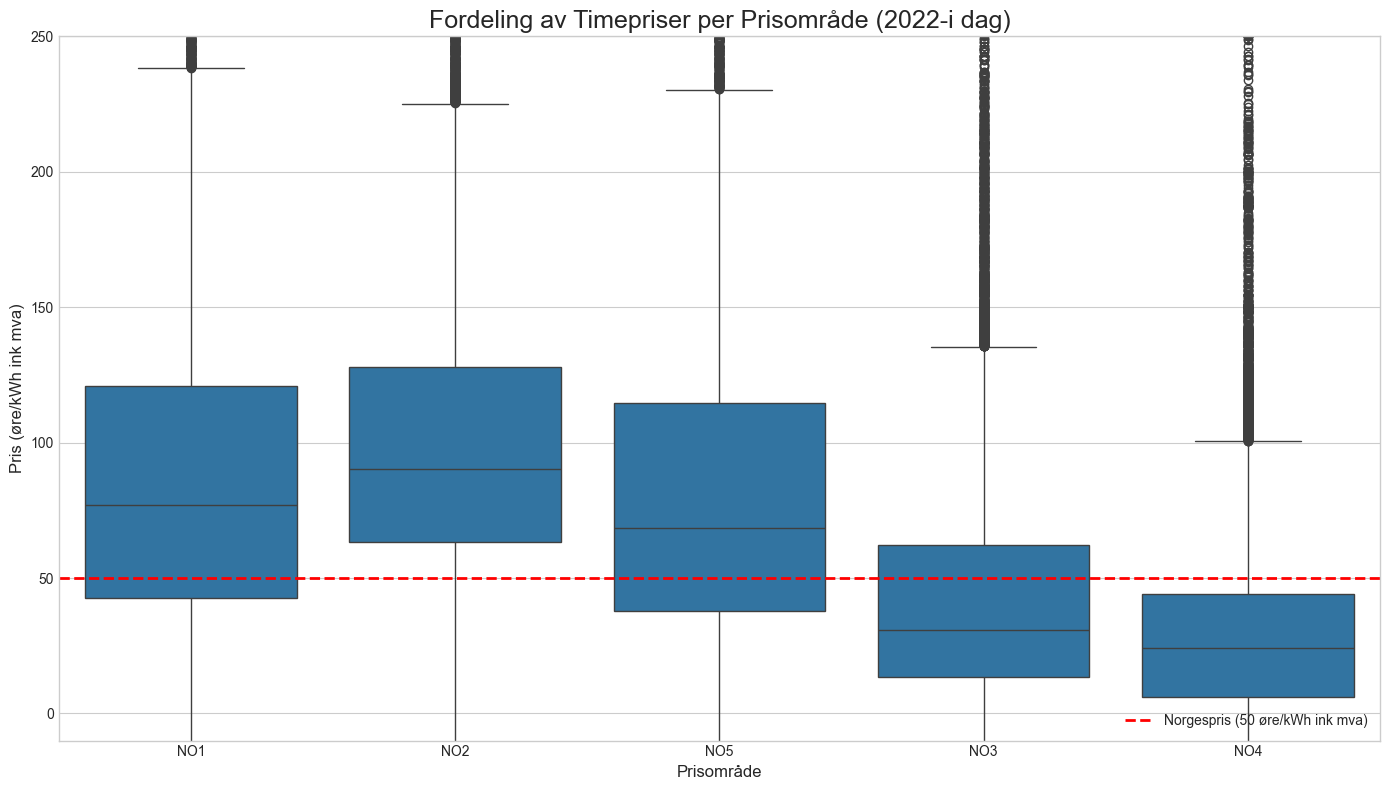

In [115]:
import seaborn as sns

# Last inn og forbered data ---
df = pd.read_csv("strompriser_2022_til_idag.csv", sep=';')
df['Ører_per_kwh'] = df['NOK_per_kWh'] * 100
df["Ører_per_kwh_inkmva"] = df["Ører_per_kwh"]*1.25

# --- 2. Lag boksplottet ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

# Vi bruker seaborn-biblioteket for å lage et oversiktlig og pent boksplott.
sns.boxplot(x='area', y='Ører_per_kwh_inkmva', data=df, ax=ax, 
            order=['NO1', 'NO2', 'NO5', 'NO3', 'NO4']) # Sorterer for bedre sammenligning

# Legg til en horisontal linje for "Norgesprisen"
ax.axhline(50, color='red', linestyle='--', linewidth=2, label='Norgespris (50 øre/kWh ink mva)')

# --- 3. Tilpass og vis plottet ---
ax.set_title('Fordeling av Timepriser per Prisområde (2022-i dag)', fontsize=18)
ax.set_xlabel('Prisområde', fontsize=12)
ax.set_ylabel('Pris (øre/kWh ink mva)', fontsize=12)
# Sett en grense på y-aksen for å "zoome inn" på den vanligste fordelingen
ax.set_ylim(-10, 250)
ax.legend()

plt.tight_layout()
plt.show()

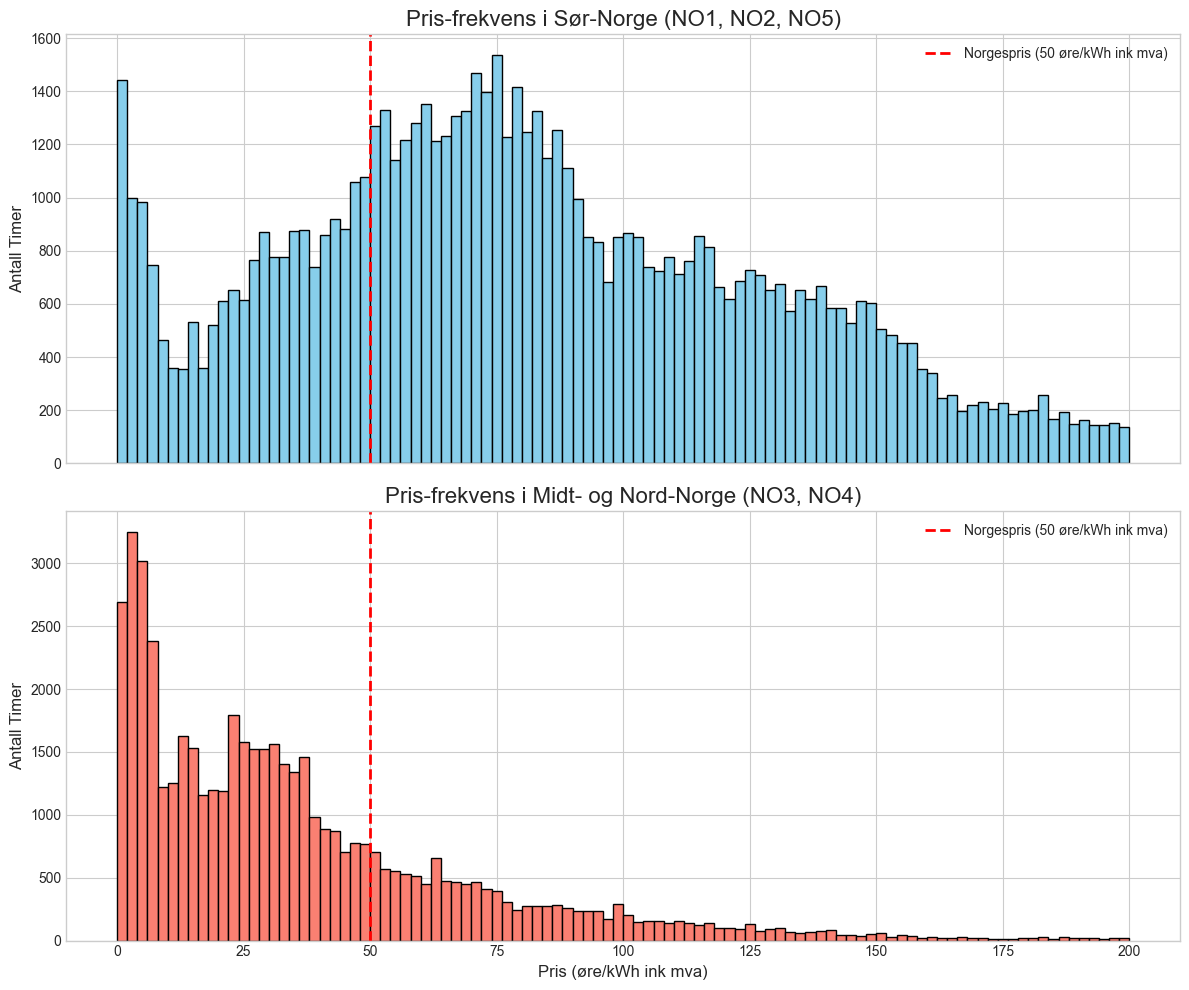

In [118]:
#Deler dataene i to grupper: sør og nord/midt slik at høye priser i nord ikke påvirker histogrammet for sør

pris_sor = df[df['area'].isin(['NO1', 'NO2', 'NO5'])]['Ører_per_kwh_inkmva']
pris_nord = df[df['area'].isin(['NO3', 'NO4'])]['Ører_per_kwh_inkmva']

# --- 2. Lag histogrammene ---
plt.style.use('_mpl-gallery')
# Oppretter en figur med to subplots (ett over det andre)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Histogram for Sør-Norge (NO1, NO2, NO5)
ax1.hist(pris_sor, bins=100, range=(0, 200), color='skyblue', edgecolor='black')
ax1.set_title('Pris-frekvens i Sør-Norge (NO1, NO2, NO5)', fontsize=16)
ax1.set_ylabel('Antall Timer', fontsize=12)
ax1.axvline(50, color='red', linestyle='--', linewidth=2, label='Norgespris (50 øre/kWh ink mva)')
ax1.legend()

# Histogram for Midt- og Nord-Norge (NO3, NO4)
ax2.hist(pris_nord, bins=100, range=(0, 200), color='salmon', edgecolor='black')
ax2.set_title('Pris-frekvens i Midt- og Nord-Norge (NO3, NO4)', fontsize=16)
ax2.set_xlabel('Pris (øre/kWh ink mva)', fontsize=12)
ax2.set_ylabel('Antall Timer', fontsize=12)
ax2.axvline(50, color='red', linestyle='--', linewidth=2, label='Norgespris (50 øre/kWh ink mva)')
ax2.legend()

plt.tight_layout()
plt.show()

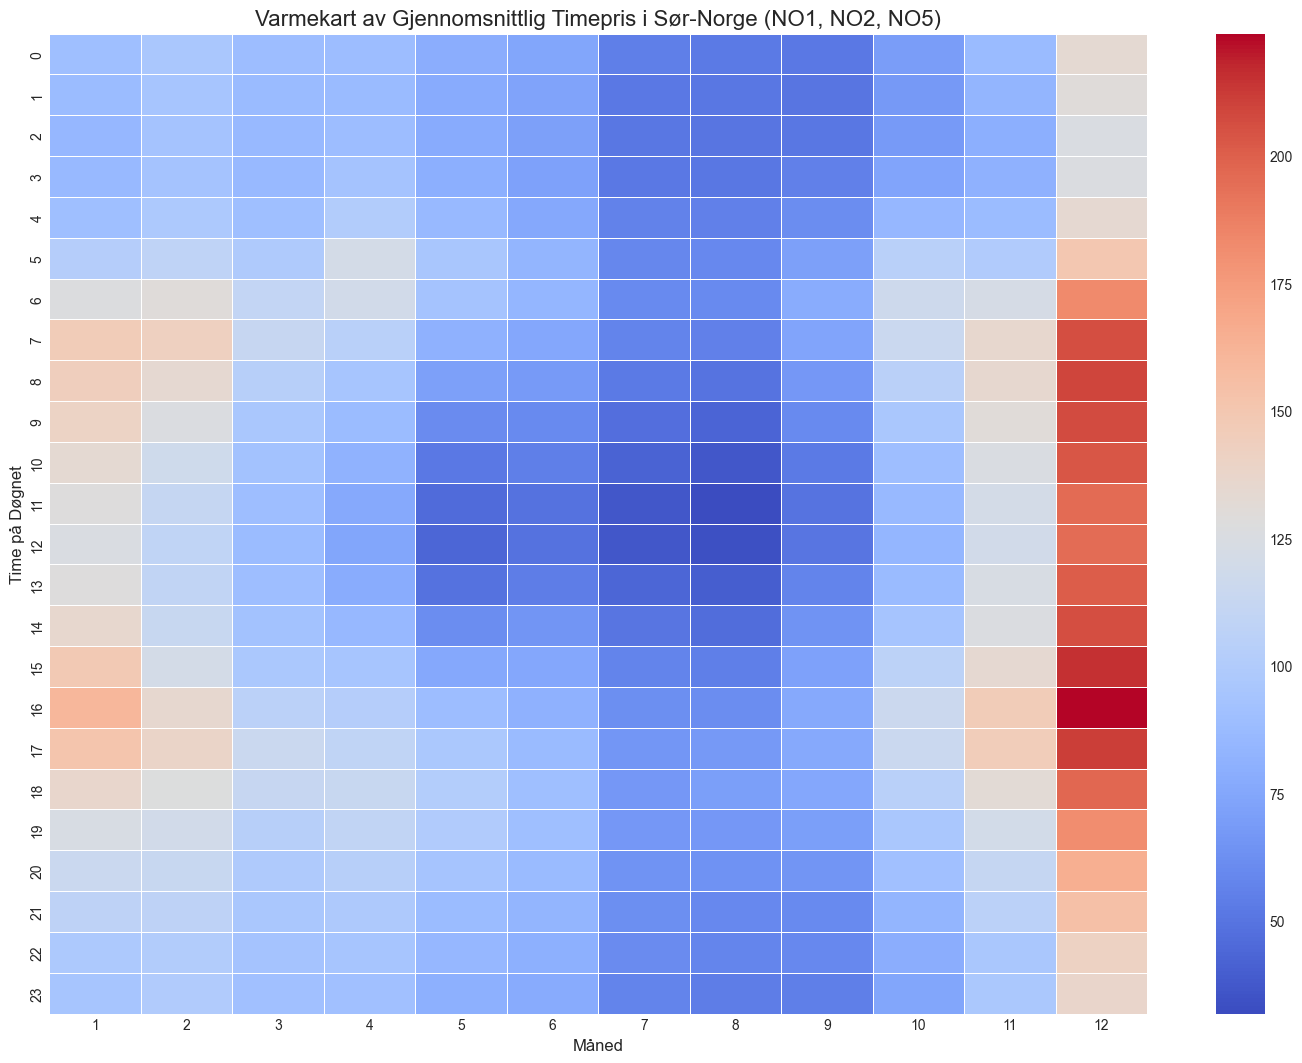

In [122]:
# --- 2. Trekk ut Måned og Time fra datotid-kolonnen ---
df['måned'] = df['time_start'].dt.month
df['time'] = df['time_start'].dt.hour

# Fokuser på Sør-Norge for et tydeligere mønster
df_sor = df[df['area'].isin(['NO1', 'NO2', 'NO5'])]

# --- 3. Lag en pivot-tabell ---
# Dette lager et rutenett med timer på y-aksen, måneder på x-aksen,
# og gjennomsnittsprisen som verdi i hver celle.
heatmap_data_sor = df_sor.pivot_table(values='Ører_per_kwh_inkmva',index='time',columns='måned')

# --- 4. Lag selve varmekartet ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data_sor,
    annot=False,  # Sett til True hvis du vil se tall i hver rute
    cmap='coolwarm',  # Et populært fargekart ('rocket', 'coolwarm' er andre alternativer)
    linewidths=0.5
)

plt.title('Varmekart av Gjennomsnittlig Timepris i Sør-Norge (NO1, NO2, NO5)', fontsize=16)
plt.xlabel('Måned', fontsize=12)
plt.ylabel('Time på Døgnet', fontsize=12)
plt.show()

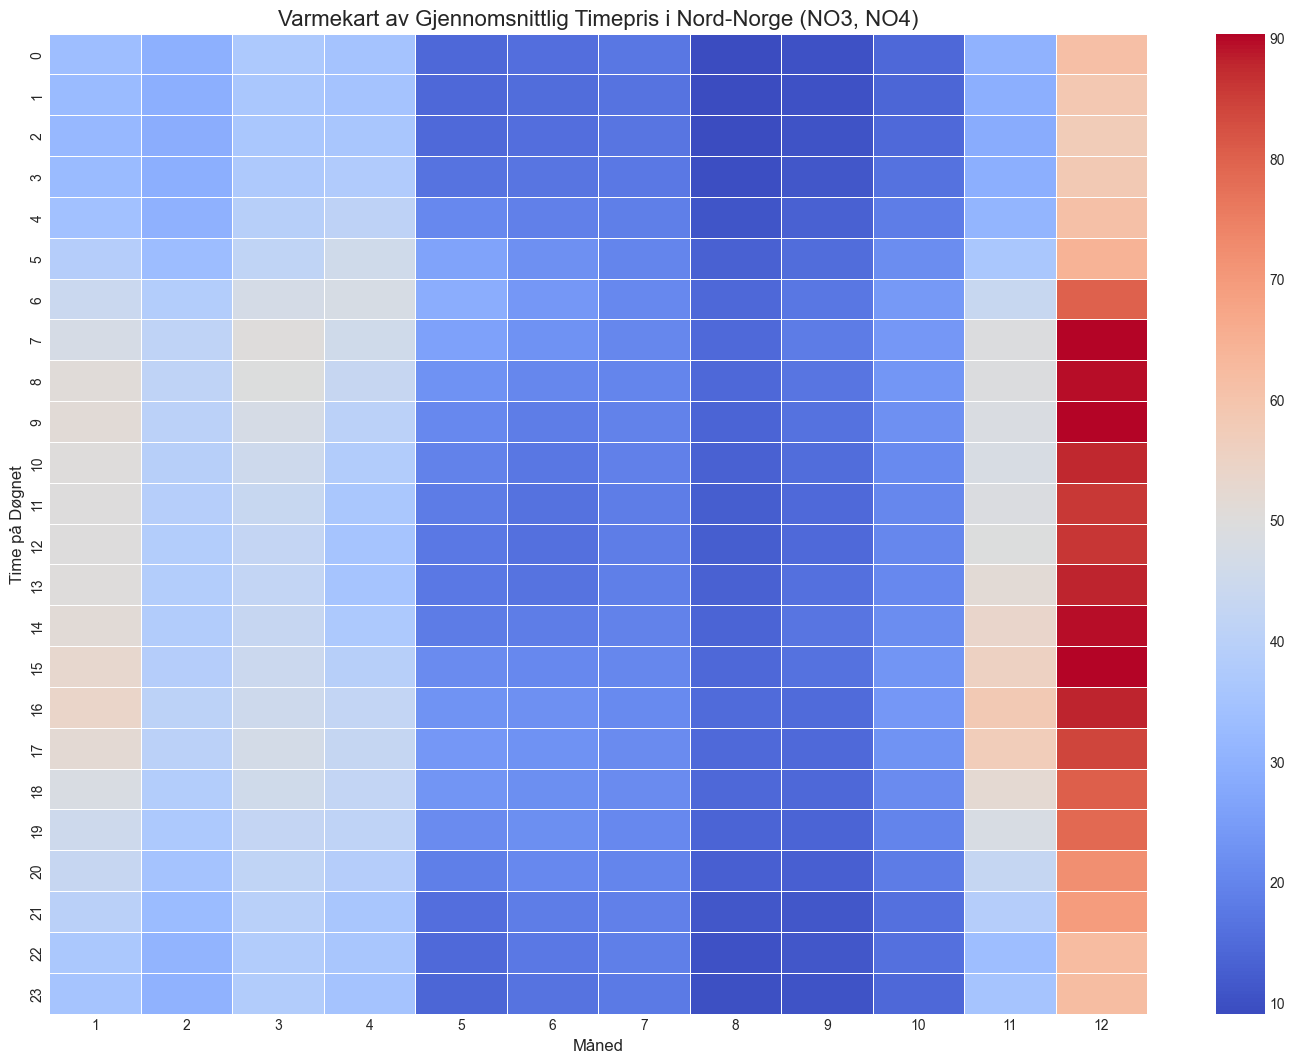

In [121]:
df_nor = df[df["area"].isin(["NO3", "NO4"])]

heatmap_data_nor = df_nor.pivot_table(values = "Ører_per_kwh", index = "time", columns= "måned")

plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data_nor,
    annot=False,  # Sett til True hvis du vil se tall i hver rute
    cmap='coolwarm',  # Et populært fargekart ('rocket', 'coolwarm' er andre alternativer)
    linewidths=0.5
)

plt.title('Varmekart av Gjennomsnittlig Timepris i Nord-Norge (NO3, NO4)', fontsize=16)
plt.xlabel('Måned', fontsize=12)
plt.ylabel('Time på Døgnet', fontsize=12)
plt.show()



In [10]:
def finn_pris_omraade(postnummer):

    if 0 <= postnummer <= 3999:
        return "NO1"  # Østlandet
    elif 4000 <= postnummer <= 4999:
        return "NO2"  # Sørlandet
    elif 5000 <= postnummer <= 5999:
        return "NO5"  # Vestlandet
    elif 6000 <= postnummer <= 7999:
        return "NO3"  # Midt-Norge
    elif 8000 <= postnummer <= 9999:
        return "NO4"  # Nord-Norge
    else:
        return "Ugyldig postnummer"
    


In [125]:


df.head(-10) #Gir de siste 10 radene i datasettet


NOK_per_kWh  EUR_per_kWh      EXR                time_start  \
0           2.57688      0.24877  10.3585 2022-09-25 22:00:00+00:00   
1           1.87996      0.18149  10.3585 2022-09-25 23:00:00+00:00   
2           1.62463      0.15684  10.3585 2022-09-26 00:00:00+00:00   
3           1.29336      0.12486  10.3585 2022-09-26 01:00:00+00:00   
4           1.04776      0.10115  10.3585 2022-09-26 02:00:00+00:00   
...             ...          ...      ...                       ...   
131865      0.59524      0.05083  11.7105 2025-09-28 07:00:00+00:00   
131866      0.60930      0.05203  11.7105 2025-09-28 08:00:00+00:00   
131867      0.65918      0.05629  11.7105 2025-09-28 09:00:00+00:00   
131868      0.51456      0.04394  11.7105 2025-09-28 10:00:00+00:00   
131869      0.47978      0.04097  11.7105 2025-09-28 11:00:00+00:00   

                        time_end area  Ører_per_kwh  Ører_per_kwh_inkmva  \
0      2022-09-25 23:00:00+00:00  NO1       257.688            322.11000   
1      2022-09-26 00:00:00+00:00  NO1       187.996            234.99500   
2      2022-09-26 01:00:00+00:00  NO1       162.463            203.07875   
3      2022-09-26 02:00:00+00:00  NO1       129.336            161.67000   
4      2022-09-26 03:00:00+00:00  NO1       104.776            130.97000   
...                          ...  ...           ...                  ...   
131865 2025-09-28 08:00:00+00:00  NO5        59.524             74.40500   
131866 2025-09-28 09:00:00+00:00  NO5        60.930             76.16250   
131867 2025-09-28 10:00:00+00:00  NO5        65.918             82.39750   
131868 2025-09-28 11:00:00+00:00  NO5        51.456             64.32000   
131869 2025-09-28 12:00:00+00:00  NO5        47.978             59.97250   

        måned  time  pris_Ører_per_kwh_inkmva  
0           9    22                 322.11000  
1           9    23                 234.99500  
2           9     0                 203.07875  
3           9     1                 161.67000  
4           9     2                 130.97000  
...       ...   ...                       ...  
131865      9     7                  74.40500  
131866      9     8                  76.16250  
131867      9     9                  82.39750  
131868      9    10                  64.32000  
131869      9    11                  59.97250  

[131870 rows x 11 columns]

In [127]:
#Henter dagens priser for et gitt område   
def hent_dagens_priser(omrade):

    idag= pd.to_datetime(datetime.today())
    
    url = f"https://www.hvakosterstrommen.no/api/v1/prices/{idag.year}/{idag.month:02d}-{idag.day:02d}_{omrade}.json"


    response = requests.get(url, verify=False)
    dagens_data_json = response.json()
    return pd.DataFrame(dagens_data_json)

#viser dataframe for dagens priser for et gitt område
#Den er main fnksjonen som kjører programmet
def vis_dagen_priser_for_postnummer():
    
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

# Validerer at postnummeret er 4 siffer og består kun av tall
    while not postnummer.isdigit() or len(postnummer) != 4:
        print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
        postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

    else:
        postnummer = int(postnummer)
        prisomraade = finn_pris_omraade(postnummer)
        print(f"Ditt prisområde er: {prisomraade}")
        dagens_priser_df = hent_dagens_priser(prisomraade)
        dagens_priser_df["Ører_per_kwh"] = dagens_priser_df["NOK_per_kWh"] * 100
        dagens_priser_df["pris_Ører_per_kwh_inkmva"] = dagens_priser_df["Ører_per_kwh"] * 1.25
        print(dagens_priser_df)

vis_dagen_priser_for_postnummer()


Ditt prisområde er: NO1
    NOK_per_kWh  EUR_per_kWh      EXR                 time_start  \
0       0.53166      0.04540  11.7105  2025-09-29T00:00:00+02:00   
1       0.52334      0.04469  11.7105  2025-09-29T01:00:00+02:00   
2       0.50589      0.04320  11.7105  2025-09-29T02:00:00+02:00   
3       0.51924      0.04434  11.7105  2025-09-29T03:00:00+02:00   
4       0.52943      0.04521  11.7105  2025-09-29T04:00:00+02:00   
5       0.49828      0.04255  11.7105  2025-09-29T05:00:00+02:00   
6       0.43762      0.03737  11.7105  2025-09-29T06:00:00+02:00   
7       0.78531      0.06706  11.7105  2025-09-29T07:00:00+02:00   
8       0.78765      0.06726  11.7105  2025-09-29T08:00:00+02:00   
9       0.75111      0.06414  11.7105  2025-09-29T09:00:00+02:00   
10      0.74221      0.06338  11.7105  2025-09-29T10:00:00+02:00   
11      0.74690      0.06378  11.7105  2025-09-29T11:00:00+02:00   
12      0.73132      0.06245  11.7105  2025-09-29T12:00:00+02:00   
13      0.72371      0.0

c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [3]:

omrader = ["NO1", "NO2", "NO3", "NO4", "NO5"]
slutt_dato = datetime.now() #Dagens dato
start_dato = slutt_dato - timedelta(days=3*365)  # Dagens dato - Siste tre år tar alltid siste 3 årets data

fullData_liste_3år = []

for dato in pd.date_range(start_dato, slutt_dato, freq="D"):
    for omrade in omrader:
        aar = dato.strftime("%Y")
        maaned = dato.strftime("%m")
        dag = dato.strftime("%d")
        url = f"https://www.hvakosterstrommen.no/api/v1/prices/{aar}/{maaned}-{dag}_{omrade}.json"
        try:
            response = requests.get(url, timeout=10, verify=False)
            if response.status_code == 200:
                dagligData = response.json()
                for timeData in dagligData:
                    ts = pd.to_datetime(timeData['time_start'])
                    # Hopp over fremtidige tidspunkter i siste dag
                    now = datetime.now(ts.tzinfo)
                    if ts.date() == now.date() and ts.hour > now.hour:
                        continue
                    timeData['area'] = omrade
                    fullData_liste_3år.append(timeData)
        except Exception as e:
            print(f"Feil for {url}: {e}")

df_3aar = pd.DataFrame(fullData_liste_3år)
df_3aar.to_csv("strompriser_siste_3_ar.csv", sep= ";" , index=False)
print("Data lasted ned. Totalt data:", len(df_3aar))

c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.hvakosterstrommen.no'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/e

Data lasted ned. Totalt data: 131470


In [7]:
df_3aar = pd.read_csv("strompriser_siste_3_ar.csv", sep= ";")
df_3aar["Ører_per_kwh"] = df_3aar["NOK_per_kWh"] * 100  # Konverterer NOK/kWh til Øre/kWh
df_3aar["pris_Ører_per_kwh_inkmva"] = df_3aar["Ører_per_kwh"] * 1.25


df_3aar['time_start'] = pd.to_datetime(df_3aar['time_start'], utc=True)
df_3aar['time_end'] = pd.to_datetime(df_3aar['time_end'], utc=True)

df_3aar.head()

NOK_per_kWh  EUR_per_kWh      EXR                time_start  \
0      0.70499      0.06661  10.5838 2022-10-01 22:00:00+00:00   
1      0.69948      0.06609  10.5838 2022-10-01 23:00:00+00:00   
2      0.63609      0.06010  10.5838 2022-10-02 00:00:00+00:00   
3      0.67673      0.06394  10.5838 2022-10-02 01:00:00+00:00   
4      0.64646      0.06108  10.5838 2022-10-02 02:00:00+00:00   

                   time_end area  Ører_per_kwh  pris_Ører_per_kwh_inkmva  
0 2022-10-01 23:00:00+00:00  NO1        70.499                  88.12375  
1 2022-10-02 00:00:00+00:00  NO1        69.948                  87.43500  
2 2022-10-02 01:00:00+00:00  NO1        63.609                  79.51125  
3 2022-10-02 02:00:00+00:00  NO1        67.673                  84.59125  
4 2022-10-02 03:00:00+00:00  NO1        64.646                  80.80750

In [8]:
def historisk_snitt_pris_omraade():
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

# Validerer at postnummeret er 4 siffer og består kun av tall
    while not postnummer.isdigit() or len(postnummer) != 4:
        print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
        postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

    else:
        postnummer = int(postnummer)
        prisomraade = finn_pris_omraade(postnummer)
        print(f"Ditt prisområde er: {prisomraade}")

    omrade_data = df_3aar[df_3aar['area'] == prisomraade]

    print(f" Snittpris i {prisomraade}: {omrade_data['pris_Ører_per_kwh_inkmva'].mean()} øre/kWh ink mva")


In [11]:
historisk_snitt_pris_omraade()

Ditt prisområde er: NO1
 Snittpris i NO1: 90.29272110557541 øre/kWh ink mva


Ditt prisområde er: NO1

Gjennomsnittlig strømpris per time i område NO1 (inkl. MVA):
time
0      74.889064
1      72.796215
2      71.719804
3      73.737121
4      80.293164
5      92.007130
6     103.797572
7     106.230996
8     100.021125
9      93.154012
10     87.125777
11     82.156513
12     81.079217
13     85.150600
14     92.076669
15    101.212154
16    110.317651
17    111.455556
18    107.087727
19     99.803555
20     93.583882
21     87.287212
22     81.711038
23     78.386787
Name: pris_Ører_per_kwh_inkmva, dtype: float64


C:\Users\bekir\AppData\Local\Temp\ipykernel_16668\2172520522.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  omrade_dataTime['time'] = omrade_dataTime['time_start'].dt.hour


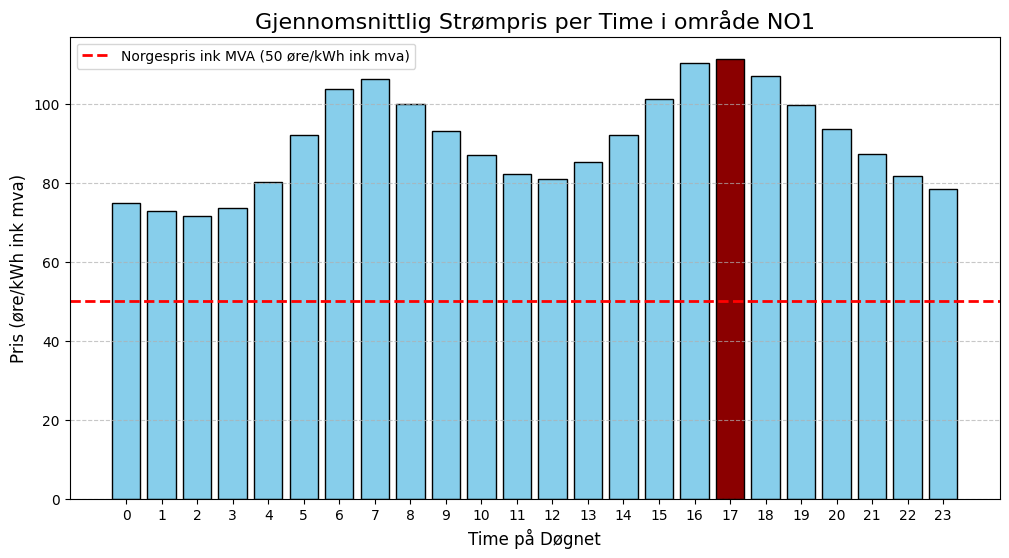

In [ ]:
def hent_snittpris_per_time():
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

# Validerer at postnummeret er 4 siffer og består kun av tall
    while not postnummer.isdigit() or len(postnummer) != 4:
        print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
        postnummer = input("Skriv inn ditt postnummer (4 siffer): ")

    else:
        postnummer = int(postnummer)
        prisomraade = finn_pris_omraade(postnummer)
        print(f"Ditt prisområde er: {prisomraade}")

    omrade_dataTime = df_3aar[df_3aar['area'] == prisomraade]

    #Trekk ut time fra datotid-kolonnen
    omrade_dataTime['time'] = omrade_dataTime['time_start'].dt.hour

    # Grupper på time og beregn snittprisen
    snittpris_per_time = omrade_dataTime.groupby('time')['pris_Ører_per_kwh_inkmva'].mean()

    print(f"\nGjennomsnittlig strømpris per time i område {prisomraade} (inkl. MVA):")
    print(snittpris_per_time)

    fig, ax = plt.subplots(figsize=(12, 6))

    # Lager søylediagrammet
    ax.bar(snittpris_per_time.index, snittpris_per_time.values, color='skyblue', edgecolor='black')

    # Setter titler og etiketter FØR plt.show()
    ax.set_title(f"Gjennomsnittlig Strømpris per Time i område {prisomraade}", fontsize=16)
    ax.set_xlabel("Time på Døgnet", fontsize=12)
    ax.set_ylabel("Pris (øre/kWh ink mva)", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.axhline(50, color='red', linestyle='--', linewidth=2, label='Norgespris ink MVA (50 øre/kWh ink mva)')
    # Setter x-aksen til å vise alle timene
    ax.set_xticks(np.arange(0, 24, 1))

    #For å endre fargen til høyeste bar
    ax.patches[snittpris_per_time.idxmax()].set_facecolor('darkred')
    ax.legend()


    # Viser det ferdige plottet
    plt.show()

hent_snittpris_per_time() #Kaller funksjonen for å se resultatet

In [ ]:
df_3aar.info() #Jeg sjekker datasettet for å begynne å prediktere fremtidige priser

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131505 entries, 0 to 131504
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   NOK_per_kWh               131505 non-null  float64            
 1   EUR_per_kWh               131505 non-null  float64            
 2   EXR                       131505 non-null  float64            
 3   time_start                131505 non-null  datetime64[ns, UTC]
 4   time_end                  131505 non-null  datetime64[ns, UTC]
 5   area                      131505 non-null  object             
 6   Ører_per_kwh              131505 non-null  float64            
 7   pris_Ører_per_kwh_inkmva  131505 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(5), object(1)
memory usage: 8.0+ MB


In [15]:
postnummer = input("Skriv inn ditt postnummer (4 siffer): ")


# Validerer at postnummeret er 4 siffer og består kun av tall
while not postnummer.isdigit() or len(postnummer) != 4:
    print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")
else:
    omrade = finn_pris_omraade(int(postnummer))



In [14]:


df_3aar['Ører_per_kwh'] = df_3aar['NOK_per_kWh'] * 100
df_3aar['time_start'] = pd.to_datetime(df_3aar['time_start'])

df_gjennomsnitlig_maned = df_3aar[df_3aar['area'] == omrade]

# Lager et nytt DataFrame med månedlige gjennomsnitt
df_manedlig = df_gjennomsnitlig_maned.set_index('time_start')['pris_Ører_per_kwh_inkmva'].resample('ME').mean().to_frame()

df_manedlig.tail(40) #Viser de siste 40 radene i datasettet

pris_Ører_per_kwh_inkmva
time_start                                         
2022-10-31 00:00:00+00:00                166.061899
2022-11-30 00:00:00+00:00                140.942377
2022-12-31 00:00:00+00:00                336.106502
2023-01-31 00:00:00+00:00                160.850551
2023-02-28 00:00:00+00:00                138.521163
2023-03-31 00:00:00+00:00                140.948505
2023-04-30 00:00:00+00:00                140.975462
2023-05-31 00:00:00+00:00                 98.430739
2023-06-30 00:00:00+00:00                 91.695922
2023-07-31 00:00:00+00:00                 46.484486
2023-08-31 00:00:00+00:00                 24.990901
2023-09-30 00:00:00+00:00                  1.349092
2023-10-31 00:00:00+00:00                 53.542292
2023-11-30 00:00:00+00:00                131.106316
2023-12-31 00:00:00+00:00                117.065486
2024-01-31 00:00:00+00:00                112.862700
2024-02-29 00:00:00+00:00                 84.762902
2024-03-31 00:00:00+00:00                 85.936537
2024-04-30 00:00:00+00:00                 79.785057
2024-05-31 00:00:00+00:00                 47.365558
2024-06-30 00:00:00+00:00                 48.770476
2024-07-31 00:00:00+00:00                 39.235176
2024-08-31 00:00:00+00:00                 16.678690
2024-09-30 00:00:00+00:00                 23.247424
2024-10-31 00:00:00+00:00                 49.959629
2024-11-30 00:00:00+00:00                 61.866635
2024-12-31 00:00:00+00:00                 62.041742
2025-01-31 00:00:00+00:00                 78.117080
2025-02-28 00:00:00+00:00                105.797349
2025-03-31 00:00:00+00:00                 57.767014
2025-04-30 00:00:00+00:00                 55.868665
2025-05-31 00:00:00+00:00                 63.180334
2025-06-30 00:00:00+00:00                 52.146976
2025-07-31 00:00:00+00:00                 22.448696
2025-08-31 00:00:00+00:00                 45.993248
2025-09-30 00:00:00+00:00                 68.850832
2025-10-31 00:00:00+00:00                 81.962708

In [16]:
print(len(df_manedlig)) #Sjekker lengden på datasettet

37


Predikert strømpris om 4 måneder: 34.27 øre/kWh inkl. mva


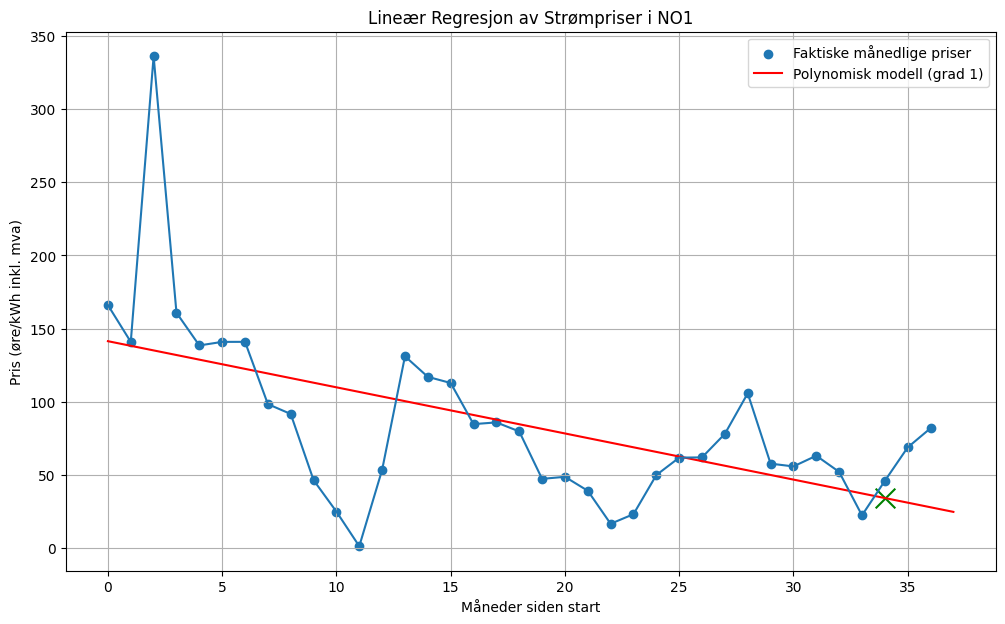

                           pris_Ører_per_kwh_inkmva  tids_indeks
time_start                                                      
2022-10-31 00:00:00+00:00                166.061899            0
2022-11-30 00:00:00+00:00                140.942377            1
2022-12-31 00:00:00+00:00                336.106502            2
2023-01-31 00:00:00+00:00                160.850551            3
2023-02-28 00:00:00+00:00                138.521163            4


In [17]:
df_manedlig['tids_indeks'] = np.arange(len(df_manedlig))

x = df_manedlig["tids_indeks"]
y = df_manedlig["pris_Ører_per_kwh_inkmva"]

#Jeg vil bruke polynomisk regresjon av grad 5 for å modellere dataene
grad = 1
mymodel= np.poly1d(np.polyfit(x, y, grad))

# Lag en jevn linje for å tegne kurven til modellen
myline = np.linspace(x.min(), x.max()+1, 200)

plt.figure(figsize=(12, 7))
# Plot de originale datapunktene
plt.scatter(x, y, label='Faktiske månedlige priser')

plt.plot(myline, mymodel(myline), color='red', label=f'Polynomisk modell (grad {grad})')

plt.plot(x,y)


plt.title(f"Lineær Regresjon av Strømpriser i {omrade}")
plt.xlabel('Måneder siden start')
plt.ylabel('Pris (øre/kWh inkl. mva)')
plt.legend()
plt.grid(True)


index= int(input("Skriv inn måned (0-39): "))
om_4mnd = mymodel(index)
print(f"Predikert strømpris om 4 måneder: {om_4mnd:.2f} øre/kWh inkl. mva")
plt.scatter(index, om_4mnd,marker="x",s=200,c="g")
plt.show()

print(df_manedlig.head())

In [19]:
df_3aar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131470 entries, 0 to 131469
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   NOK_per_kWh               131470 non-null  float64            
 1   EUR_per_kWh               131470 non-null  float64            
 2   EXR                       131470 non-null  float64            
 3   time_start                131470 non-null  datetime64[ns, UTC]
 4   time_end                  131470 non-null  datetime64[ns, UTC]
 5   area                      131470 non-null  object             
 6   Ører_per_kwh              131470 non-null  float64            
 7   pris_Ører_per_kwh_inkmva  131470 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(5), object(1)
memory usage: 8.0+ MB


In [143]:
df_3aar.describe()

NOK_per_kWh    EUR_per_kWh            EXR   Ører_per_kwh  \
count  131505.00000  131505.000000  131505.000000  131505.000000   
mean        0.57458       0.050959      11.473827      57.458050   
std         0.58752       0.054585       0.426104      58.752015   
min        -0.70930      -0.061840      10.183500     -70.930000   
25%         0.18885       0.016740      11.356000      18.885000   
50%         0.45247       0.039230      11.612000      45.247000   
75%         0.79009       0.068760      11.759000      79.009000   
max        10.53782       0.898250      12.110800    1053.782000   

       pris_Ører_per_kwh_inkmva  
count             131505.000000  
mean                  71.822562  
std                   73.440018  
min                  -88.662500  
25%                   23.606250  
50%                   56.558750  
75%                   98.761250  
max                 1317.227500

In [20]:
#Finner z score for å finne outliers

df_3aar["z_score"] = (df_3aar["pris_Ører_per_kwh_inkmva"]-71.820892)/ 73.440217
df_3aar_renset = df_3aar[df_3aar["z_score"].abs() <= 3]
print(df_3aar_renset)

        NOK_per_kWh  EUR_per_kWh      EXR                time_start  \
0           0.70499      0.06661  10.5838 2022-10-01 22:00:00+00:00   
1           0.69948      0.06609  10.5838 2022-10-01 23:00:00+00:00   
2           0.63609      0.06010  10.5838 2022-10-02 00:00:00+00:00   
3           0.67673      0.06394  10.5838 2022-10-02 01:00:00+00:00   
4           0.64646      0.06108  10.5838 2022-10-02 02:00:00+00:00   
...             ...          ...      ...                       ...   
131465      0.66772      0.05718  11.6775 2025-10-01 07:00:00+00:00   
131466      0.65242      0.05587  11.6775 2025-10-01 08:00:00+00:00   
131467      0.66106      0.05661  11.6775 2025-10-01 09:00:00+00:00   
131468      0.65114      0.05576  11.6775 2025-10-01 10:00:00+00:00   
131469      0.64682      0.05539  11.6775 2025-10-01 11:00:00+00:00   

                        time_end area  Ører_per_kwh  pris_Ører_per_kwh_inkmva  \
0      2022-10-01 23:00:00+00:00  NO1        70.499               

In [40]:
#Jeg sjekket lengden og fant at to data ble slettet
print(len(df_3aar_renset))

129174


In [21]:
df_3aar_renset['Ører_per_kwh'] = df_3aar_renset['NOK_per_kWh'] * 100
df_3aar_renset['time_start'] = pd.to_datetime(df_3aar_renset['time_start'])
df_3aar_renset["pris_Ører_per_kwh_inkmva"] = df_3aar_renset["Ører_per_kwh"]*1.25
df_gjennomsnitlig_maned_renset = df_3aar_renset[df_3aar_renset['area'] == omrade]

# Lager et nytt DataFrame med månedlige gjennomsnitt
df_manedlig_renset = df_gjennomsnitlig_maned_renset.set_index('time_start')['pris_Ører_per_kwh_inkmva'].resample('ME').mean().to_frame()

df_manedlig_renset.tail(40) #Viser de siste 40 radene i datasettet

C:\Users\bekir\AppData\Local\Temp\ipykernel_16668\3603838098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3aar_renset['Ører_per_kwh'] = df_3aar_renset['NOK_per_kWh'] * 100
C:\Users\bekir\AppData\Local\Temp\ipykernel_16668\3603838098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3aar_renset['time_start'] = pd.to_datetime(df_3aar_renset['time_start'])
C:\Users\bekir\AppData\Local\Temp\ipykernel_16668\3603838098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

pris_Ører_per_kwh_inkmva
time_start                                         
2022-10-31 00:00:00+00:00                154.447577
2022-11-30 00:00:00+00:00                114.529108
2022-12-31 00:00:00+00:00                182.664906
2023-01-31 00:00:00+00:00                155.482893
2023-02-28 00:00:00+00:00                143.622089
2023-03-31 00:00:00+00:00                140.443384
2023-04-30 00:00:00+00:00                138.522582
2023-05-31 00:00:00+00:00                 97.976673
2023-06-30 00:00:00+00:00                 91.736849
2023-07-31 00:00:00+00:00                 45.956967
2023-08-31 00:00:00+00:00                 24.973891
2023-09-30 00:00:00+00:00                  1.362000
2023-10-31 00:00:00+00:00                 54.027727
2023-11-30 00:00:00+00:00                128.400524
2023-12-31 00:00:00+00:00                112.461804
2024-01-31 00:00:00+00:00                109.867195
2024-02-29 00:00:00+00:00                 83.732351
2024-03-31 00:00:00+00:00                 84.477560
2024-04-30 00:00:00+00:00                 75.130530
2024-05-31 00:00:00+00:00                 46.645682
2024-06-30 00:00:00+00:00                 47.898509
2024-07-31 00:00:00+00:00                 35.708476
2024-08-31 00:00:00+00:00                 16.017567
2024-09-30 00:00:00+00:00                 26.413495
2024-10-31 00:00:00+00:00                 49.880403
2024-11-30 00:00:00+00:00                 70.160832
2024-12-31 00:00:00+00:00                 65.409659
2025-01-31 00:00:00+00:00                 88.252572
2025-02-28 00:00:00+00:00                118.366056
2025-03-31 00:00:00+00:00                 65.246588
2025-04-30 00:00:00+00:00                 74.923135
2025-05-31 00:00:00+00:00                 88.644598
2025-06-30 00:00:00+00:00                 66.721217
2025-07-31 00:00:00+00:00                 62.094093
2025-08-31 00:00:00+00:00                 90.582367
2025-09-30 00:00:00+00:00                 74.576590
2025-10-31 00:00:00+00:00                 80.206042

In [148]:
print(len(df_manedlig_renset))

37


In [23]:
#Sjekker infoene av renset data. Da ser vi at max og min ble endret. Outliers ble fjernet
print(df_manedlig_renset.describe())

       pris_Ører_per_kwh_inkmva
count                 37.000000
mean                  83.988229
std                   42.211714
min                    1.362000
25%                   54.027727
50%                   80.206042
75%                  112.461804
max                  182.664906


Predikert strømpris om 3 måneder: 44.54 øre/kWh inkl. mva


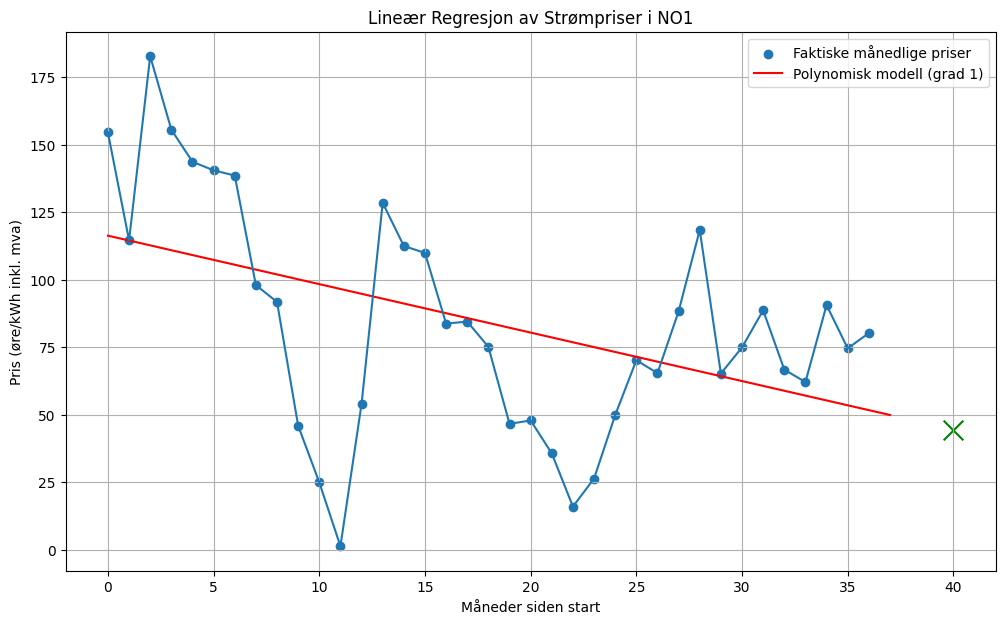

In [25]:
df_manedlig_renset['tids_indeks'] = np.arange(len(df_manedlig_renset))
x = df_manedlig_renset["tids_indeks"]
y = df_manedlig_renset["pris_Ører_per_kwh_inkmva"]

#Jeg vil bruke polynomisk regresjon av grad 5 for å modellere dataene
grad = 1
mymodel= np.poly1d(np.polyfit(x, y, grad))

# Lag en jevn linje for å tegne kurven til modellen
myline = np.linspace(x.min(), x.max()+1, 200)

plt.figure(figsize=(12, 7))
# Plot de originale datapunktene
plt.scatter(x, y, label='Faktiske månedlige priser')

plt.plot(myline, mymodel(myline), color='red', label=f'Polynomisk modell (grad {grad})')

plt.plot(x,y)


plt.title('Lineær Regresjon av Strømpriser i NO1')
plt.xlabel('Måneder siden start')
plt.ylabel('Pris (øre/kWh inkl. mva)')
plt.legend()

plt.grid(True)


index= int(input("Skriv inn måned du vil prediktere (Tallet du skriver definerer antall mnd i fremtid): "))
om_mnd = mymodel(len(df_manedlig_renset)+index)
print(f"Predikert strømpris om {index} måneder: {om_mnd:.2f} øre/kWh inkl. mva")
plt.scatter((len(df_manedlig_renset)+index), om_mnd,marker="x",s=200,c="g")
plt.show()


✅ Døgnmodell for NO1 er ferdig trent.
Siste kjente pris (i går): 80.21 øre/kWh
Predikert snittpris for i morgen i NO1: 80.47 øre/kWh


c:\Users\bekir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


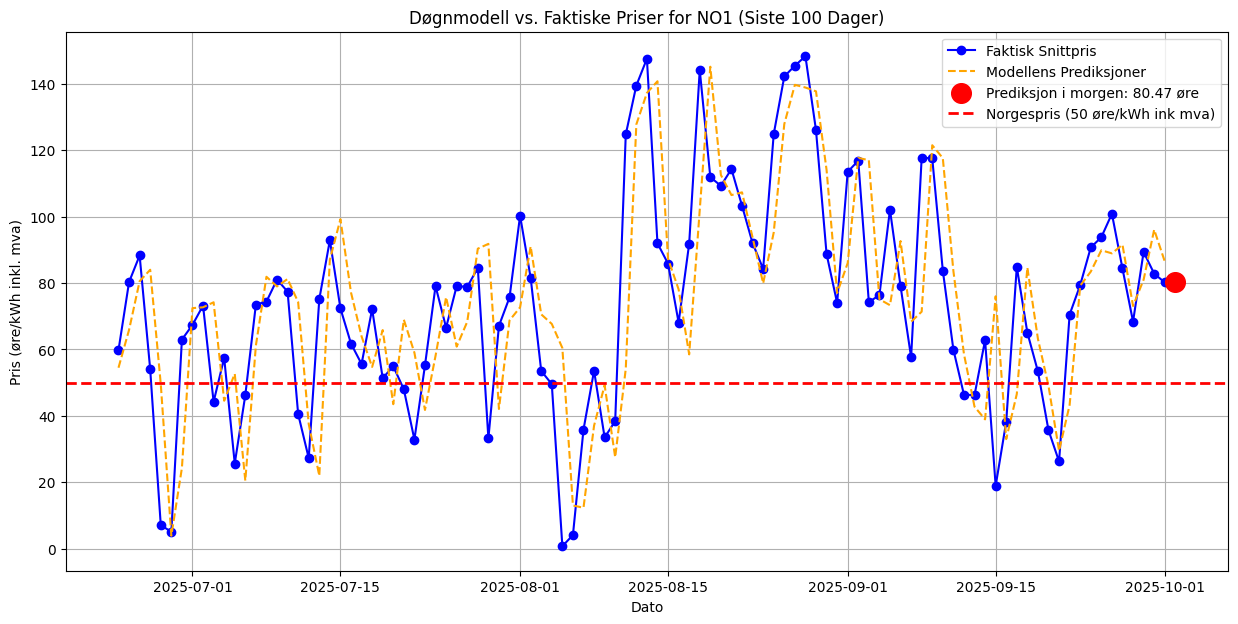

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

postnummer = input("Skriv inn ditt postnummer (4 siffer): ")


# Validerer at postnummeret er 4 siffer og består kun av tall
while not postnummer.isdigit() or len(postnummer) != 4:
    print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")
else:
    omrade = finn_pris_omraade(int(postnummer))


df_omrade = df_3aar_renset[df_3aar_renset['area'] == omrade]

# Lager en dataframe for daglig snittpris (tar time_start og Ører_per_kwh_inkmva kolonner, finner snitt)
df_daglig = df_omrade.set_index('time_start')['pris_Ører_per_kwh_inkmva'].resample('D').mean().to_frame()


# Ukedag (Mandag=0, Søndag=6)
df_daglig['ukedag'] = df_daglig.index.dayofweek
# Prisen fra dagen før. .shift(1) flytter alle prisene ett hakk ned.
df_daglig['pris_i_gar'] = df_daglig['pris_Ører_per_kwh_inkmva'].shift(1)

# Fjern den første raden, som mangler "pris_i_gar"
df_daglig = df_daglig.dropna()

# --- 3. Bygg og tren modellen ---
X = df_daglig[['ukedag', 'pris_i_gar']] # Input: Ukedag og gårsdagens pris
y = df_daglig['pris_Ører_per_kwh_inkmva']          # Output: Dagens pris

dogn_modell = LinearRegression()
dogn_modell.fit(X, y)

print(f"✅ Døgnmodell for {omrade} er ferdig trent.")

# --- 4. Lag en prediksjon for i morgen ---
# For å spå morgendagen, trenger vi dagens pris og morgendagens ukedag
siste_kjente_pris = df_daglig['pris_Ører_per_kwh_inkmva'].iloc[-1]
morgendagens_dato = df_daglig.index[-1] + pd.Timedelta(days=1)
morgendagens_ukedag = morgendagens_dato.dayofweek

prediksjon_for_morgen = dogn_modell.predict([[morgendagens_ukedag, siste_kjente_pris]])

print(f"Siste kjente pris (i går): {siste_kjente_pris:.2f} øre/kWh")
print(f"Predikert snittpris for i morgen i {omrade}: {prediksjon_for_morgen[0]:.2f} øre/kWh")

historiske_prediksjoner = dogn_modell.predict(X)

# 2. Lag plottet
plt.figure(figsize=(15, 7))
# Plot de faktiske prisene for de siste 100 dagene
plt.plot(df_daglig.index[-100:], y.tail(100), label='Faktisk Snittpris', color='blue', marker='o', linestyle='-')
# Plot modellens historiske prediksjoner for de samme dagene
plt.plot(df_daglig.index[-100:], historiske_prediksjoner[-100:], label='Modellens Prediksjoner', color='orange', linestyle='--')
# Plot prediksjonspunktet for i morgen (riktig x-verdi!)
plt.scatter(morgendagens_dato, prediksjon_for_morgen, color='red', s=200, zorder=5, label=f'Prediksjon i morgen: {prediksjon_for_morgen[0]:.2f} øre')
#Norges pris ink MVA
plt.axhline(50, color='red', linestyle='--', linewidth=2, label='Norgespris (50 øre/kWh ink mva)')
plt.title(f'Døgnmodell vs. Faktiske Priser for {omrade} (Siste 100 Dager)')
plt.xlabel('Dato')
plt.ylabel('Pris (øre/kWh inkl. mva)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
postnummer = input("Skriv inn ditt postnummer (4 siffer): ")


# Validerer at postnummeret er 4 siffer og består kun av tall
while not postnummer.isdigit() or len(postnummer) != 4:
    print("Ugyldig postnummer. Vennligst skriv inn et 4-sifret postnummer.")
    postnummer = input("Skriv inn ditt postnummer (4 siffer): ")
else:
    omrade = finn_pris_omraade(int(postnummer))


df_omrade = df_3aar_renset[df_3aar_renset['area'] == omrade]

df_omrade = df_3aar_renset[df_3aar_renset['area'] == omrade].copy()
print(df_omrade.tail())

# Sørg for at time_start er datetime
df_omrade['time_start'] = pd.to_datetime(df_omrade['time_start'])
df_omrade['time'] = df_omrade['time_start'].dt.hour



# --- 3. Definer vekter ---
def hent_vekt(time):
    if (6 <= time <= 9) or (16 <= time <= 22):
        return 3 # Høyforbruk
    else:
        return 1 # Lavforbruk

df_omrade['vekt'] = df_omrade['time'].apply(hent_vekt)

# --- 4. Beregn og sammenlign priser ---
# Vanlig, uvektet gjennomsnitt
vanlig_snittpris = df_omrade["pris_Ører_per_kwh_inkmva"].mean()

# Vektet gjennomsnitt
vektet_snittpris = (df_omrade['pris_Ører_per_kwh_inkmva'] * df_omrade['vekt']).sum() / df_omrade['vekt'].sum()

# --- 5. Presenter resultatet ---
print(f"--- Analyse for postnummer {postnummer} (Område: {omrade}) ---")
print(f"Vanlig gjennomsnittspris: {vanlig_snittpris:.2f} øre/kWh")
print(f"Vektet pris (din reelle snittpris): {vektet_snittpris:.2f} øre/kWh")
print("-" * 20)

print("Vurdering av Norgespris ink mva (50 øre/kWh):")
if vektet_snittpris > 50:
    print("-> Din reelle pris er HØYERE enn 50 øre. Norgesprisen ville ha vært LØNNSOM for deg.")
else:
    print("-> Din reelle pris er LAVERE enn 50 øre. Norgesprisen ville IKKE ha vært lønnsom for deg.")

        NOK_per_kWh  EUR_per_kWh      EXR                time_start  \
131451      0.13476      0.01154  11.6775 2025-10-01 07:00:00+00:00   
131452      0.12612      0.01080  11.6775 2025-10-01 08:00:00+00:00   
131453      0.10743      0.00920  11.6775 2025-10-01 09:00:00+00:00   
131454      0.12133      0.01039  11.6775 2025-10-01 10:00:00+00:00   
131455      0.11759      0.01007  11.6775 2025-10-01 11:00:00+00:00   

                        time_end area  Ører_per_kwh  pris_Ører_per_kwh_inkmva  \
131451 2025-10-01 08:00:00+00:00  NO4        13.476                  16.84500   
131452 2025-10-01 09:00:00+00:00  NO4        12.612                  15.76500   
131453 2025-10-01 10:00:00+00:00  NO4        10.743                  13.42875   
131454 2025-10-01 11:00:00+00:00  NO4        12.133                  15.16625   
131455 2025-10-01 12:00:00+00:00  NO4        11.759                  14.69875   

         z_score  
131451 -0.748580  
131452 -0.763286  
131453 -0.795098  
131454 -0.